# CNN Optimization Case Study  
## Architecture vs Optimizer Impact on CIFAR-10  

Author: SRIKANTH REDDY NANDIREDDY  
Graduate Student – Data Science & AI  

---

### Key Insight  
Architectural depth improved representation learning, but optimization strategy ultimately determined generalization performance.

---

## Objective  

This notebook investigates:

- Does increasing CNN depth improve performance?
- How does optimizer choice influence convergence and generalization?
- How can overfitting be diagnosed using validation behavior?

Dataset: CIFAR-10  
Framework: TensorFlow / Keras

# Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load and Preprocess Data

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

Training shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


# Experiment 1: Baseline CNN (SGD)

Objective:
Establish a simple CNN baseline using SGD optimizer.

In [13]:
def build_baseline_model(optimizer):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

baseline_model = build_baseline_model(SGD())

history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

baseline_test_loss, baseline_test_acc = baseline_model.evaluate(x_test, y_test)
print(f"Baseline Test Accuracy: {baseline_test_acc*100:.2f}%")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2395 - loss: 2.0911 - val_accuracy: 0.3406 - val_loss: 1.8695
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3812 - loss: 1.7545 - val_accuracy: 0.4135 - val_loss: 1.6354
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4410 - loss: 1.5839 - val_accuracy: 0.4310 - val_loss: 1.5646
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4849 - loss: 1.4567 - val_accuracy: 0.4808 - val_loss: 1.4345
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5170 - loss: 1.3600 - val_accuracy: 0.4967 - val_loss: 1.4157
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5415 - loss: 1.3011 - val_accuracy: 0.5294 - val_loss: 1.3215
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5664 - loss: 1.2360 - val_accuracy: 0.5319 - val_loss: 1.3163
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5756 - loss: 1.2060 - val_accuracy: 0.

# Experiment 2: Deep CNN (SGD)

Objective:
Test whether increasing depth improves performance using the same optimizer.

In [14]:
def build_deep_model(optimizer):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        Dropout(0.2),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        Dropout(0.2),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        Dropout(0.2),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

deep_sgd_model = build_deep_model(SGD())

history_deep_sgd = deep_sgd_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

deep_sgd_test_loss, deep_sgd_test_acc = deep_sgd_model.evaluate(x_test, y_test)
print(f"Deep CNN (SGD) Test Accuracy: {deep_sgd_test_acc*100:.2f}%")

best_epoch = np.argmax(history_deep_sgd.history['val_accuracy'])
best_val_acc = np.max(history_deep_sgd.history['val_accuracy'])

print(f"Best validation accuracy at epoch {best_epoch+1}: {best_val_acc*100:.2f}%")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.1323 - loss: 2.2639 - val_accuracy: 0.2376 - val_loss: 2.0600
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2752 - loss: 1.9819 - val_accuracy: 0.3556 - val_loss: 1.8806
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3448 - loss: 1.8233 - val_accuracy: 0.3451 - val_loss: 1.8098
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3877 - loss: 1.6995 - val_accuracy: 0.4192 - val_loss: 1.6366
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4208 - loss: 1.5990 - val_accuracy: 0.4514 - val_loss: 1.5406
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4494 - loss: 1.5301 - val_accuracy: 0.4504 - val_loss: 1.5343
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4716 - loss: 1.4714 - val_accuracy: 0.4875 - val_loss: 1.4433
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4949 - loss: 1.4112 - val_accuracy: 

# Experiment 3: Deep CNN (Adam)

Objective:
Evaluate the impact of optimizer change while keeping architecture constant.

In [15]:
deep_adam_model = build_deep_model(Adam())

history_deep_adam = deep_adam_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

deep_adam_test_loss, deep_adam_test_acc = deep_adam_model.evaluate(x_test, y_test)
print(f"Deep CNN (Adam) Test Accuracy: {deep_adam_test_acc*100:.2f}%")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.2964 - loss: 1.8850 - val_accuracy: 0.5149 - val_loss: 1.3293
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5382 - loss: 1.2730 - val_accuracy: 0.5970 - val_loss: 1.1146
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6479 - loss: 0.9917 - val_accuracy: 0.6721 - val_loss: 0.9436
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7053 - loss: 0.8406 - val_accuracy: 0.7033 - val_loss: 0.8523
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7385 - loss: 0.7375 - val_accuracy: 0.7486 - val_loss: 0.7411
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7678 - loss: 0.6533 - val_accuracy: 0.7513 - val_loss: 0.7357
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7977 - loss: 0.5824 - val_accuracy: 0.7572 - val_loss: 0.7169
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8122 - loss: 0.5298 - val_accuracy: 

# Overfitting Analysis

Visualizing divergence between training and validation accuracy.

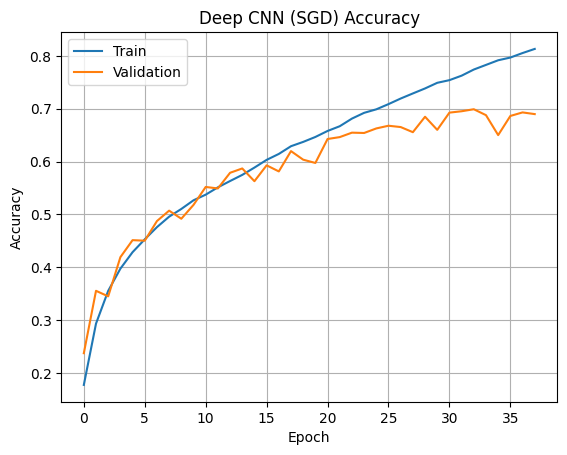

In [16]:
plt.figure()
plt.plot(history_deep_sgd.history['accuracy'])
plt.plot(history_deep_sgd.history['val_accuracy'])
plt.title("Deep CNN (SGD) Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid(True)
plt.show()

# Optimizer Comparison

Comparing validation accuracy between SGD and Adam.

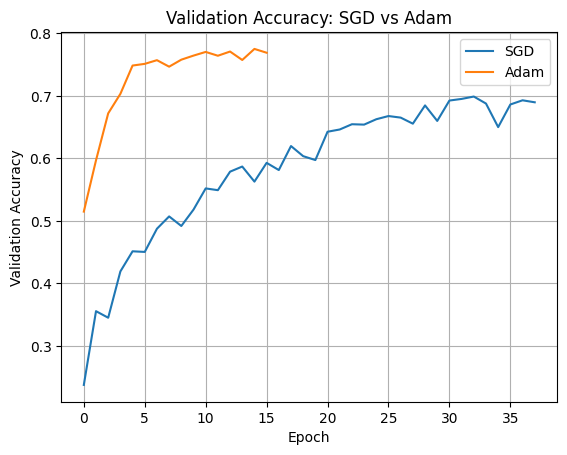

In [17]:
plt.figure()
plt.plot(history_deep_sgd.history['val_accuracy'])
plt.plot(history_deep_adam.history['val_accuracy'])
plt.title("Validation Accuracy: SGD vs Adam")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend(["SGD", "Adam"])
plt.grid(True)
plt.show()

# Sample Predictions

In [18]:
predictions = deep_adam_model.predict(x_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

print("Predicted:", predicted_classes)
print("Actual:", actual_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [3 8 8 0]
Actual: [3 8 8 0]


# Final Results Summary

| Model | Test Accuracy |
|-------|--------------|
| Baseline CNN (SGD) | 60.05% |
| Deep CNN (SGD) | 69.90% |
| Deep CNN (Adam) | 77.04% |

---

## Key Insights

- Increasing architectural depth improved performance only when paired with an appropriate optimization strategy.
- The Deep CNN trained with SGD exhibited overfitting, as evidenced by divergence between training and validation accuracy.
- Replacing SGD with Adam improved test accuracy by over 7%, demonstrating the significant impact of adaptive optimization.
- Optimization strategy had a greater effect on generalization than architectural complexity alone.

---

## Conclusion

This case study demonstrates that CNN performance is strongly influenced by optimization dynamics and training configuration, not just model depth.

Effective model development requires:

- Monitoring validation behavior
- Diagnosing overfitting early
- Selecting appropriate optimizers
- Designing controlled experiments

Deep learning success is driven by disciplined experimentation and training stability — not simply stacking additional layers.